In [1]:
import numpy as np
import collections
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from emukit.core import ParameterSpace, ContinuousParameter

from transfergpbo.benchmarks import hartmann
from transfergpbo import experiment, experiment_1
from transfergpbo import parameters

import warnings
warnings.filterwarnings("ignore")

In [2]:
x_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
x = np.array(x_list).reshape(-1,1)
x.shape

(8, 1)

In [3]:
hartmann.hartmann3d_function(x)

array([[-0.0681142 ],
       [-0.06938533],
       [-0.08315794],
       [-0.34664797],
       [-0.30047607],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

In [4]:
parameters.parameters['benchmark']['num_source_points'] = [30]
parameters.parameters['technique'] = 'GPBO'

In [5]:
parameters.parameters['benchmark']['num_steps'] = 5

In [6]:
parameters.parameters

{'technique': 'GPBO',
 'benchmark': {'name': 'hartmann3d',
  'num_source_points': [30],
  'num_steps': 5,
  'parameters_source': None,
  'parameters_target': None},
 'output_noise': 0.1}

In [7]:
np.random.seed(1)
benchmark_tuple = experiment_1.get_benchmark(benchmark_name='hartmann3d', num_source_points= [30])
benchmark_tuple[1][0].X

array([[0.39676747, 0.01828828, 0.94459476],
       [0.53881673, 0.75014431, 0.58655504],
       [0.41919451, 0.98886109, 0.90340192],
       [0.6852195 , 0.74816565, 0.1374747 ],
       [0.20445225, 0.28044399, 0.13927635],
       [0.87811744, 0.78927933, 0.80739129],
       [0.02738759, 0.10322601, 0.39767684],
       [0.67046751, 0.44789353, 0.1653542 ],
       [0.4173048 , 0.9085955 , 0.92750858],
       [0.55868983, 0.29361415, 0.34776586],
       [0.14038694, 0.28777534, 0.7508121 ],
       [0.19810149, 0.13002857, 0.72599799],
       [0.80074457, 0.01936696, 0.88330609],
       [0.96826158, 0.67883553, 0.62367221],
       [0.31342418, 0.21162812, 0.75094243],
       [0.69232262, 0.26554666, 0.34889834],
       [0.87638915, 0.49157316, 0.26992789],
       [0.89460666, 0.05336255, 0.89588622],
       [0.08504421, 0.57411761, 0.42809119],
       [0.03905478, 0.14672857, 0.96484005],
       [0.16983042, 0.58930554, 0.6634415 ],
       [0.8781425 , 0.69975836, 0.62169572],
       [0.

In [29]:
output = collections.defaultdict(list)
for i in tqdm(range(10), desc='GPBO'):
    np.random.seed(i)
    output['iter'].append(i)
    #output['regret'].append(experiment.run_experiment(parameters.parameters))
    output['output_tuple_regret'].append(experiment_1.run_experiment(parameters.parameters))
#experiment_1.run_experiment(parameters.parameters)
output


# output = collections.defaultdict(list)
# for i in tqdm(range(50), desc='MHGP'):
#     output['iter'].append(i)
#     output['regret'].append(experiment.run_experiment(parameters.parameters))
# #regret = experiment.run_experiment(parameters.parameters)

GPBO:   0%|          | 0/10 [00:00<?, ?it/s]

defaultdict(list,
            {'iter': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
             'output_tuple_regret': [[3.8824932394565104,
               1.2196978779902685,
               1.2196978779902685,
               0.3365838557234424,
               0.3365838557234424],
              [3.768331718760614,
               3.6656926549945537,
               3.6656926549945537,
               3.247607582887033,
               2.646390538887161],
              [3.151817167413676,
               3.151817167413676,
               3.0359558578307064,
               3.0359558578307064,
               3.0359558578307064],
              [3.7746909801448862,
               2.548118790565331,
               2.548118790565331,
               2.309746056782706,
               2.3022391151647583],
              [1.2125429035210975,
               1.2125429035210975,
               1.2125429035210975,
               1.082807081783573,
               1.082807081783573],
              [4.012078442232775,
  

In [260]:
r_a = np.concatenate([ii[0] for ii in output['output_tuple_X_Y_regret']])
r_a.shape

(300, 3)

In [261]:
np.mean(r_a, dtype=np.float64, axis=0)

array([0.46116154, 0.56058487, 0.62791609])

In [9]:
#experiment.run_experiment(parameters.parameters)

#np.array([i for i in output['regret']])
np.mean(np.array([i for i in output['output_tuple_regret']]), dtype=np.float64, axis=0)
#np.concatenate([i for i in output['regret']])

array([3.3205459 , 2.8229762 , 2.79788553, 2.56583949, 2.2838118 ])

In [10]:
np.mean(np.array([i for i in output['output_tuple_regret']]), dtype=np.float64, axis=0)

array([3.3205459 , 2.8229762 , 2.79788553, 2.56583949, 2.2838118 ])

In [11]:
np.mean(np.array(output['output_tuple_regret']), axis=0)

array([3.3205459 , 2.8229762 , 2.79788553, 2.56583949, 2.2838118 ])

In [207]:
#np.mean(np.array([i[2] for i in output['output_tuple_X_Y_regret']]), dtype=np.float64, axis=0)

In [208]:
# regret_50 = np.array(output['regret'])
# regret_50.shape[0]

In [209]:
# np.mean(regret_50, dtype=np.float64, axis=0)

In [210]:
# np.std(regret_50, dtype=np.float64, axis=0) / np.sqrt(regret_50.shape[0])

In [97]:
# plot_opt_plus_uncertainty(np.mean(regret_50, dtype=np.float64, axis=0),
#                          np.std(regret_50, dtype=np.float64, axis=0) / np.sqrt(regret_50.shape[1]),
#                          'MHGP')

In [18]:
technique_list = ['GPBO', 'MHGP', 'SHGP', 'BHGP', 'WSGP', 'HGP', 'MTGP', 'RGPE']

def run_bo_50(technique):
    parameters.parameters['technique'] = technique
    output = collections.defaultdict(list)
    
    for i in tqdm(range(50), desc=f'Running {technique}'):
        np.random.seed(i)
        output['iter'].append(i)
        output['regret'].append(experiment.run_experiment(parameters.parameters))
    regret_array = np.array(output['regret'])
    output_mean = np.mean(regret_array, dtype=np.float64, axis=0)
    output_std_error = np.std(regret_array, dtype=np.float64, axis=0) / np.sqrt(regret_array.shape[1])
    
    return output_mean, output_std_error

In [20]:
def plot_opt_plus_uncertainty(mean_array, stderror_array, model_name):
    x_values = np.arange(1,len(mean_array)+1)
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x_values, y=mean_array, label=f'Mean - {model_name}', marker='o')
    plt.fill_between(x=x_values, y1=mean_array - stderror_array, y2=mean_array + stderror_array, alpha=0.25)
    plt.yscale('log') 
    plt.xlabel('Iteration')
    plt.ylabel('Regret (log scale)')
    plt.title('Mean Regret with Standard Error Hartmann3d')
    plt.legend()
    plt.show()

def plot_means_and_errors(result_dict):
    plt.figure(figsize=(10, 8))

    for key, values in result_dict.items():
        if 'mean' in key:
            technique_name = key.replace('_mean', '')
            mean_array = values
            stderr_array = result_dict.get(f'{technique_name}_stderr', np.zeros_like(mean_array))
            
            x_values = np.arange(1,len(mean_array)+1)
            
            sns.lineplot(x=x_values, y=mean_array, label=f'{technique_name}', marker='o')
            plt.fill_between(x=x_values, y1=mean_array - stderr_array, y2=mean_array + stderr_array, alpha=0.25)

    plt.yscale('log')  
    plt.xlabel('Iteration')
    plt.ylabel('Regret (log scale)')
    plt.title('Means with Standard Errors Hartmann3d')
    plt.legend()
    plt.show()

In [13]:
# result_dict = {}

# for name in tqdm(technique_list[4:7]):
#     mean, stderr = run_bo_50(name)
#     result_dict[f'{name}_mean'] = mean
#     result_dict[f'{name}_stderr'] = stderr
    

In [37]:
import pickle

file_1 = '/Users/martinmejia/transfergpbo/EI_acc/results_dict_all_plus_points.pkl'
file_2 = '/Users/martinmejia/transfergpbo/UCB_acc/results_dict_all_plus_points.pkl'
# with open(file_path, 'wb') as file:
#     pickle.dump(result_dict, file)

with open(file_1, 'rb') as file:
    loaded_dict_1 = pickle.load(file)

with open(file_2, 'rb') as file:
    loaded_dict_2 = pickle.load(file)
    

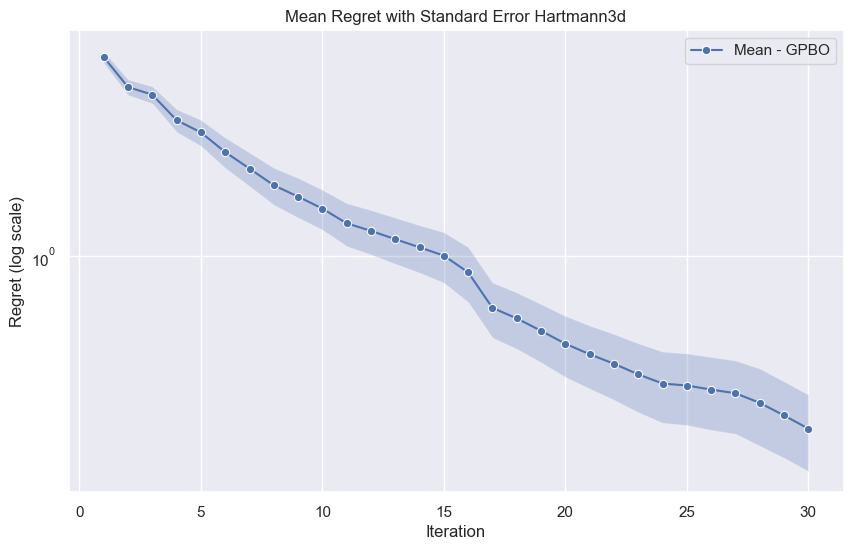

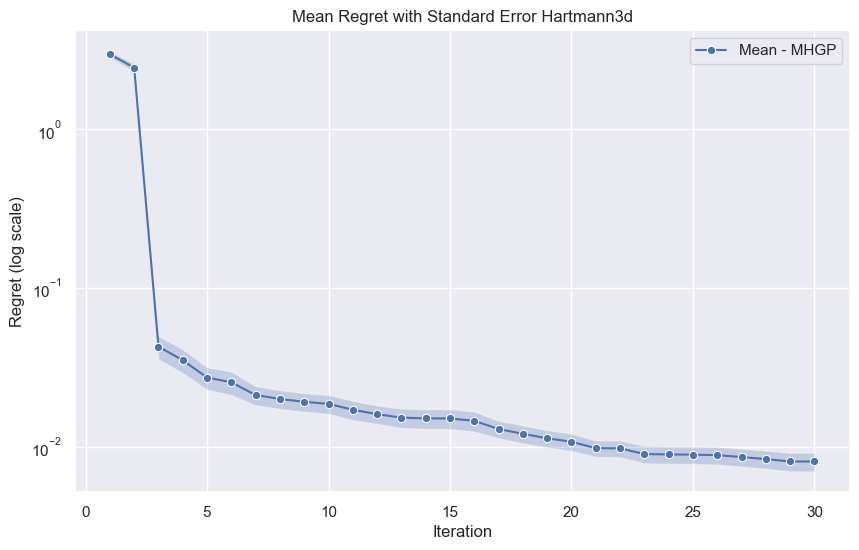

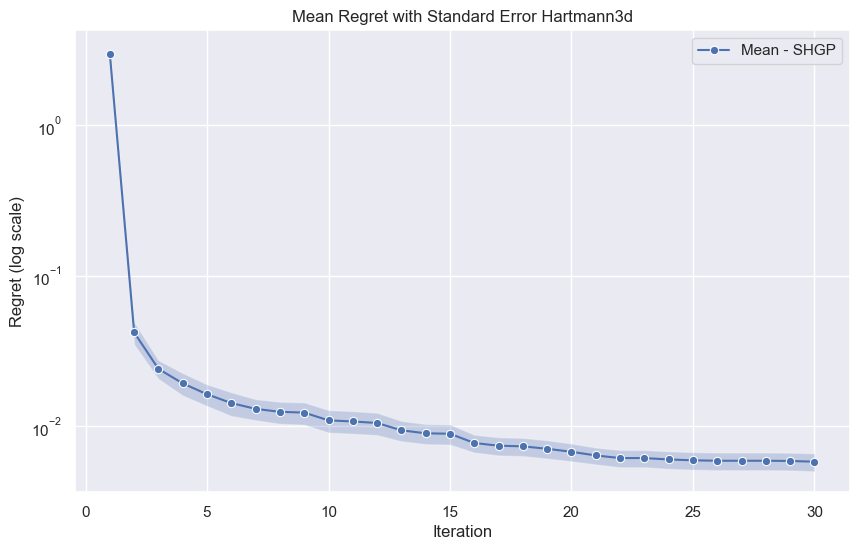

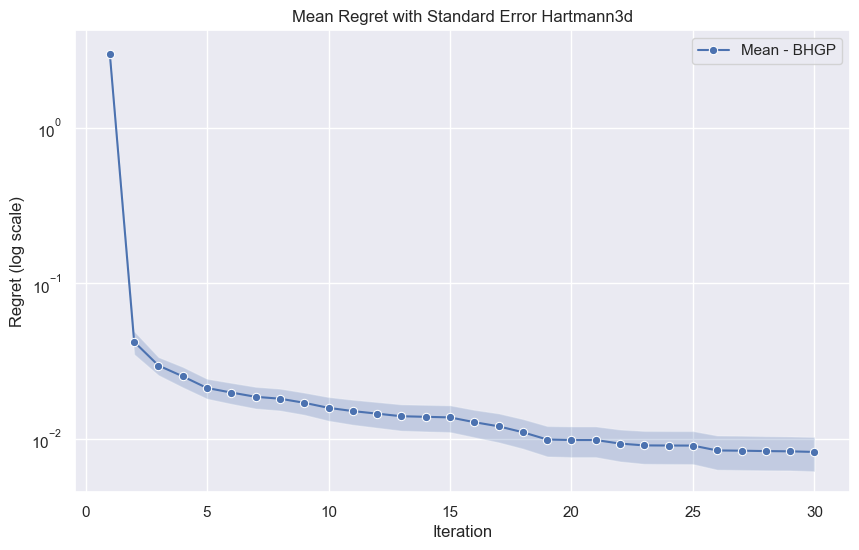

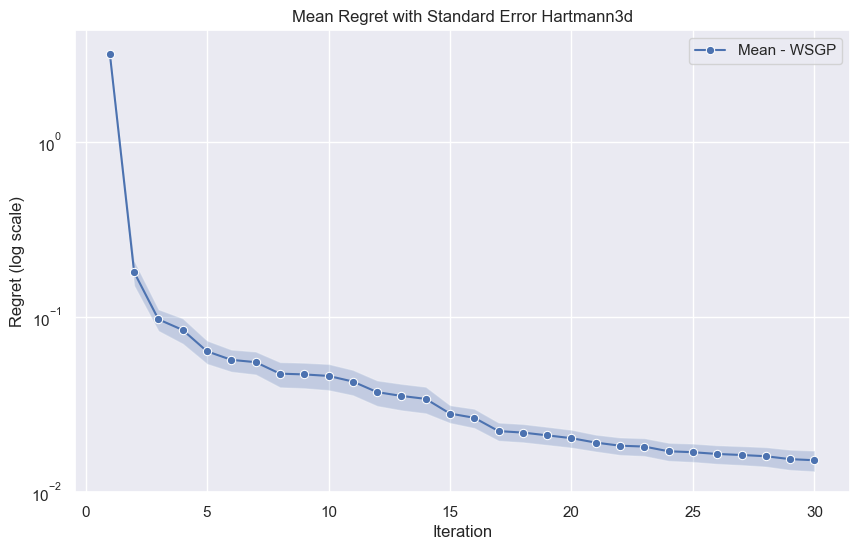

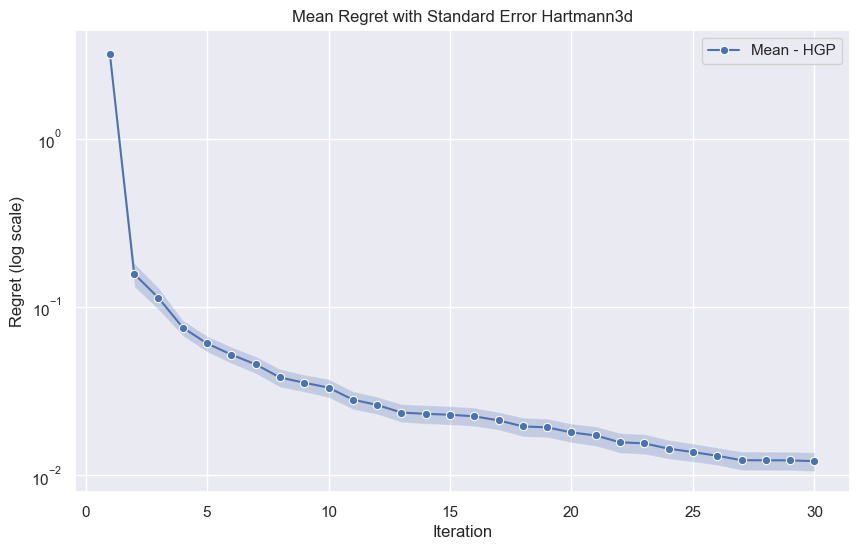

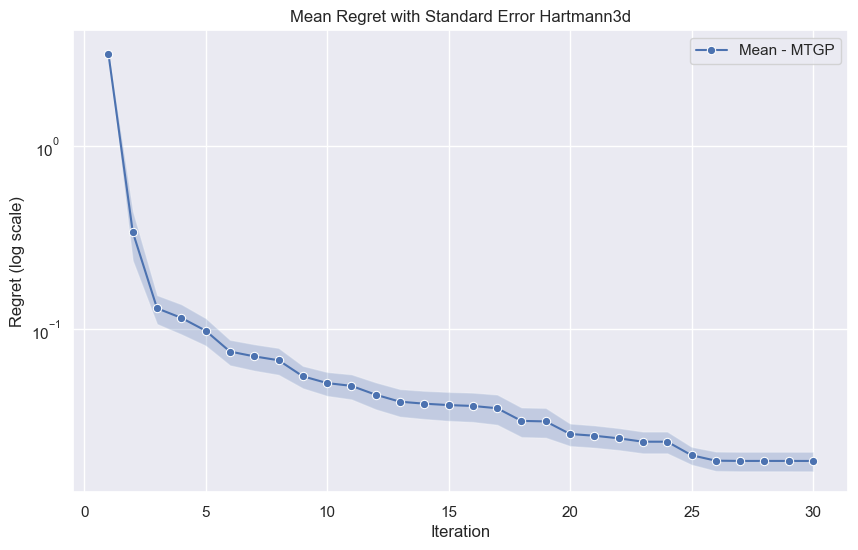

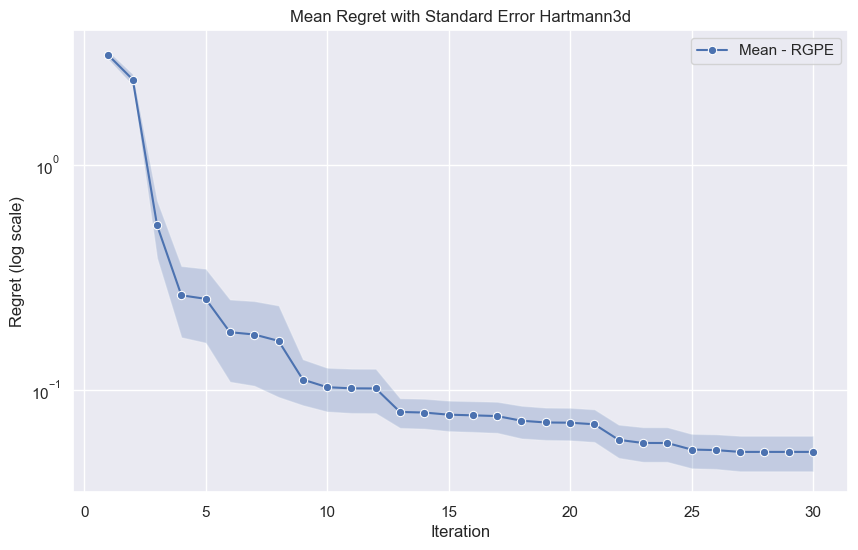

In [34]:
for i in technique_list:
    plot_opt_plus_uncertainty(loaded_dict[f'{i}_mean'],
                         loaded_dict[f'{i}_stderr'],
                         i)


Expected Improvement Acquisition Function


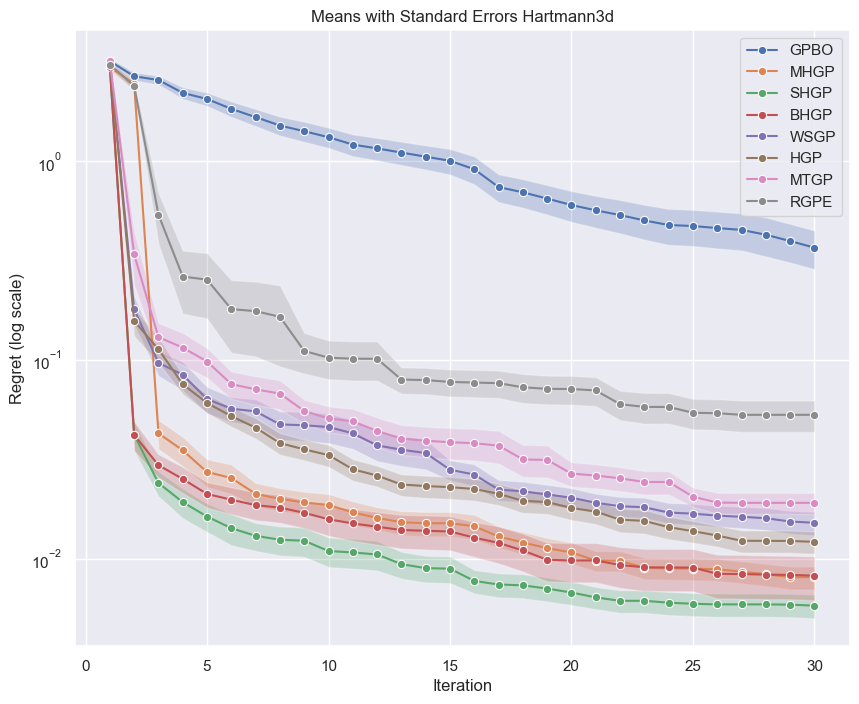

Upper Confidence Bound Acquisition Function


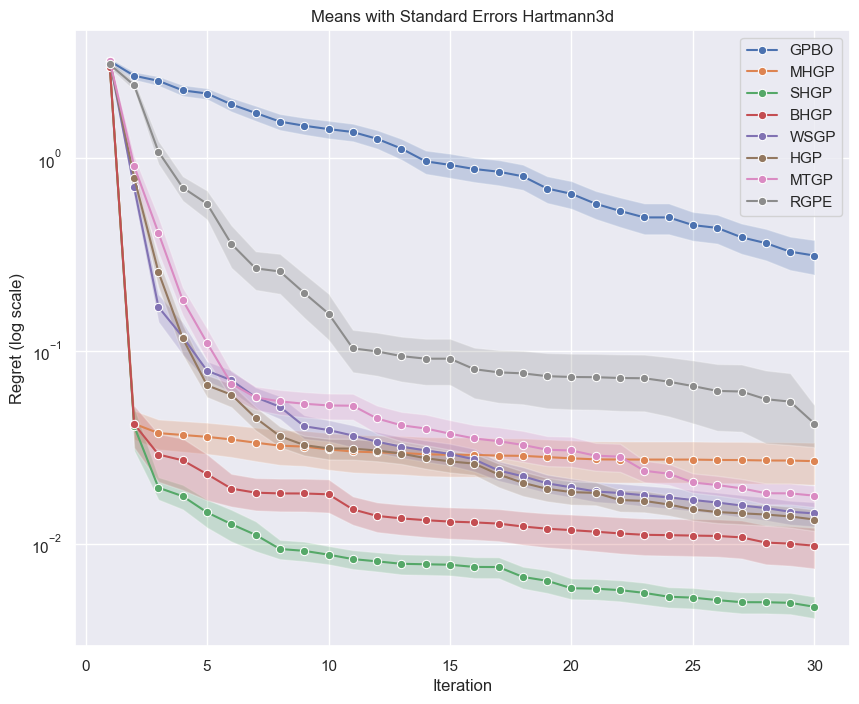

In [40]:
for d, n in zip([loaded_dict_1, loaded_dict_2], 
                ['Expected Improvement Acquisition Function', 
                 'Upper Confidence Bound Acquisition Function']):
    print(n)
    plot_means_and_errors(d)

In [52]:
for d, n in zip([loaded_dict_1, loaded_dict_2],
                ['Expected Improvement Acquisition Function', 
                 'Upper Confidence Bound Acquisition Function']
               ):
    print(f"{n}: min_val = {np.amin(d['SHGP_mean']):.4f}")

Expected Improvement Acquisition Function: min_val = 0.0058
Upper Confidence Bound Acquisition Function: min_val = 0.0047


In [23]:
technique_list

['GPBO', 'MHGP', 'SHGP', 'BHGP', 'WSGP', 'HGP', 'MTGP', 'RGPE']

Expected Improvement Acquisition Function


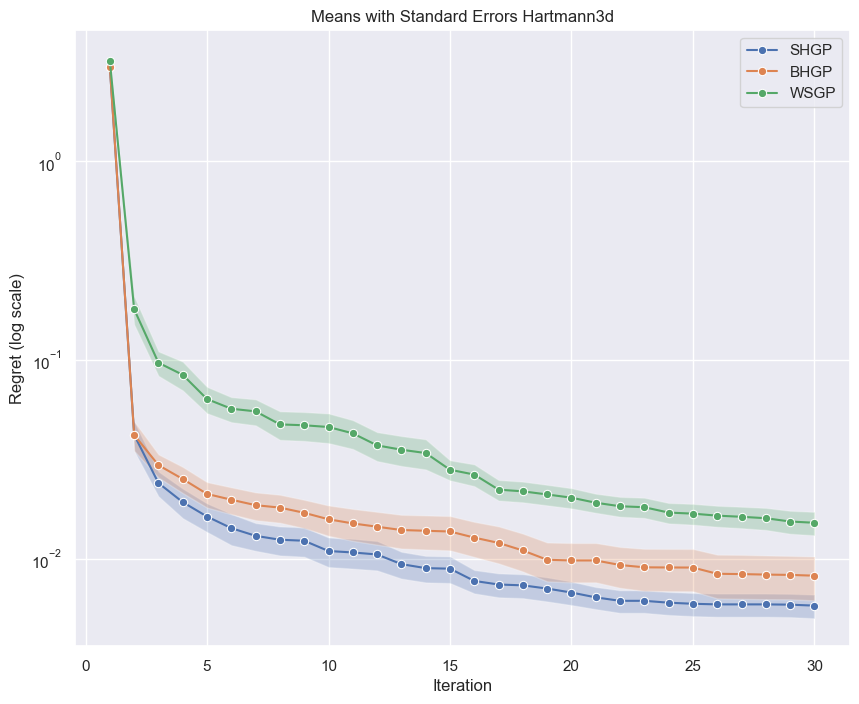

Upper Confidence Bound Acquisition Function


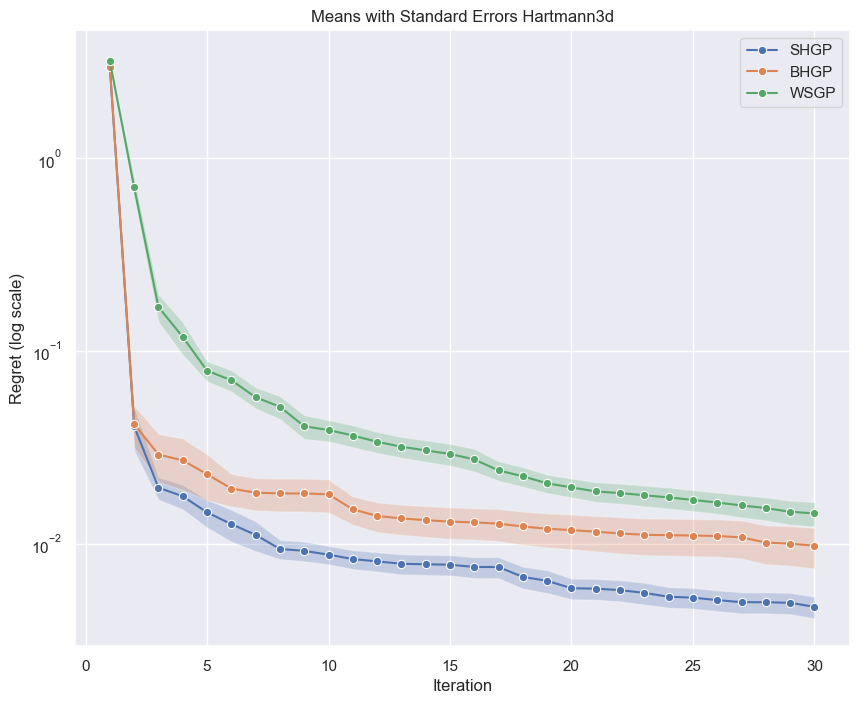

In [50]:
specific_models = ['SHGP','BHGP', 'WSGP']
for d, n in zip([loaded_dict_1, loaded_dict_2],
                ['Expected Improvement Acquisition Function', 
                 'Upper Confidence Bound Acquisition Function']
               ):
    to_plot_dict = {k: v for k, v in d.items() if any(substring in k for substring in specific_models)}
    print(n)
    plot_means_and_errors(to_plot_dict)